In [1]:
import pandas as pd
import plotly.express as px

In [2]:
train = pd.read_csv("train.csv")
train.head()

,mean,sd
0,0.564877,0.231592
1,-0.118285,0.020446
2,-0.157953,-0.106749
3,-0.157953,-0.106749
4,-0.157953,-0.106242


In [3]:
train.shape

(64227, 2)

In [4]:
test = pd.read_csv("test.csv")
test.head()

,mean,sd
0,-0.157953,-0.106749
1,-0.157953,-0.106749
2,-0.157953,-0.106242
3,-0.284889,-0.106749
4,-0.157953,-0.106242


In [5]:
test.shape

(16057, 2)

In [6]:
from sklearn.ensemble import IsolationForest

In [7]:
model = IsolationForest(random_state=16, contamination=0.001)

In [8]:
model.fit(train)

IsolationForest(contamination=0.001, random_state=16)

/usr/local/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


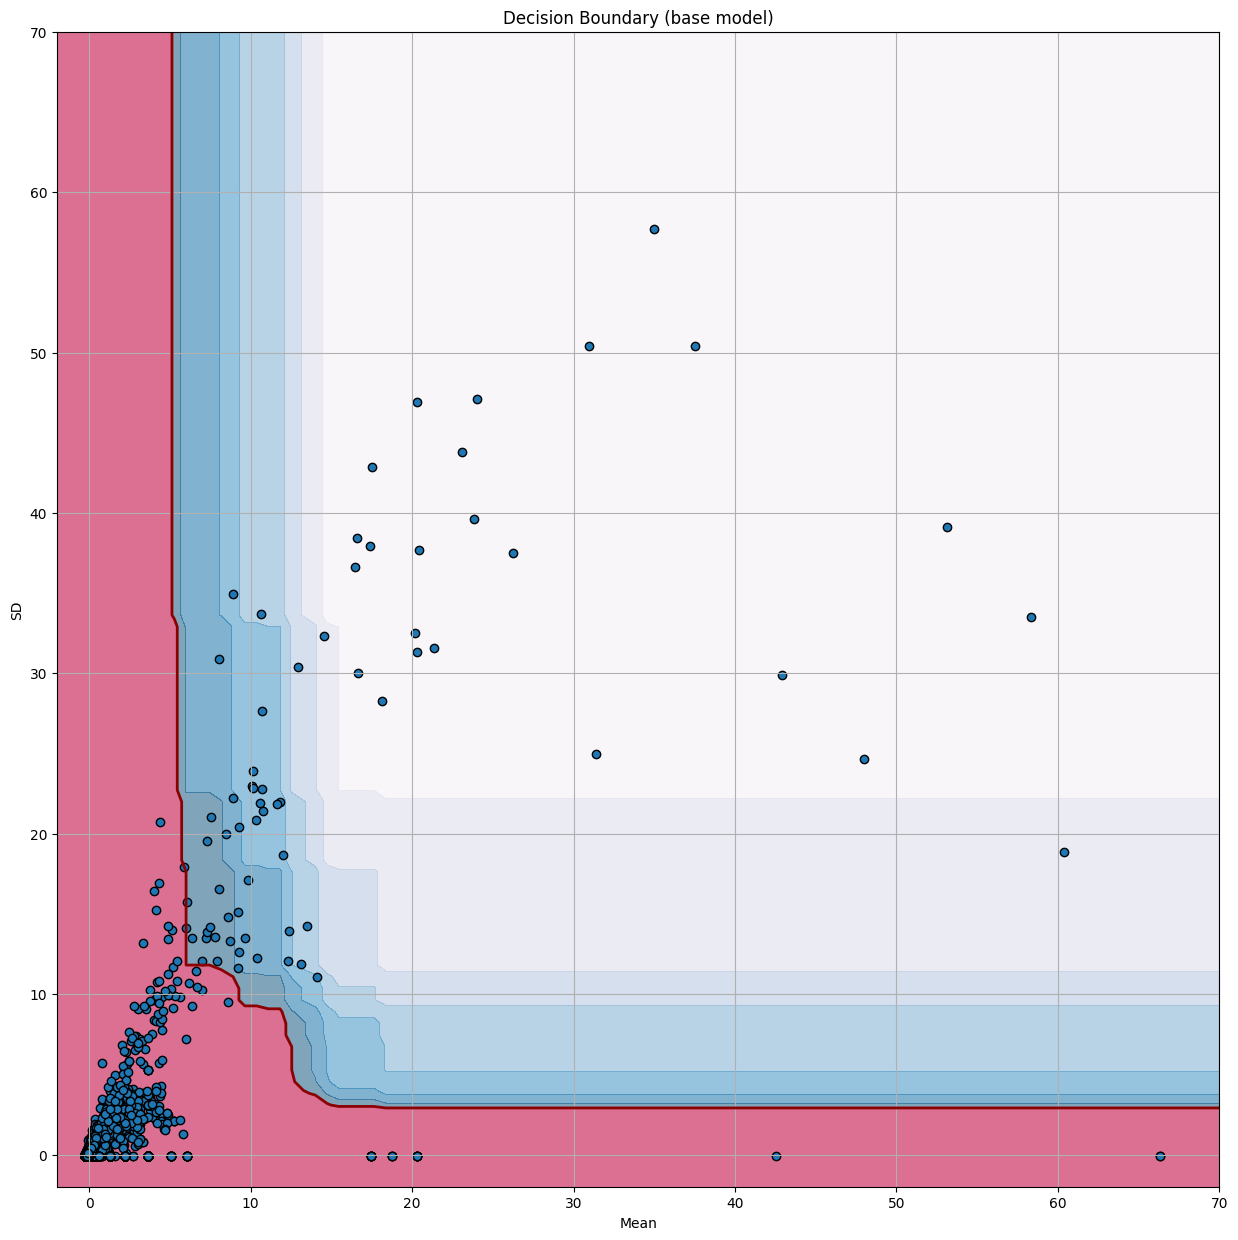

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Change the plot's size.
plt.rcParams['figure.figsize'] = [15, 15]

# Plot of the decision frontier
xx, yy = np.meshgrid(np.linspace(-2, 70, 100), np.linspace(-2, 70, 100))
Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.title("Decision Boundary (base model)")
# This draw the "soft" or secondary boundaries.
plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 8), cmap=plt.cm.PuBu, alpha=0.5)
# This draw the line that separates the hard from the soft boundaries.
plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='darkred')
# This draw the hard boundary
plt.contourf(xx, yy, Z, levels=[0, Z.max()], colors='palevioletred')
plt.scatter(train.iloc[:, 0],
            train.iloc[:, 1],
            edgecolors='k')
plt.xlabel('Mean')
plt.ylabel('SD')
plt.grid(True)
plt.show()

In [10]:
predictions = model.predict(test)

In [11]:
df_predictions = pd.concat([test, pd.Series(predictions)], axis=1)
df_predictions.columns = ['mean', 'sd', 'output']

/usr/local/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


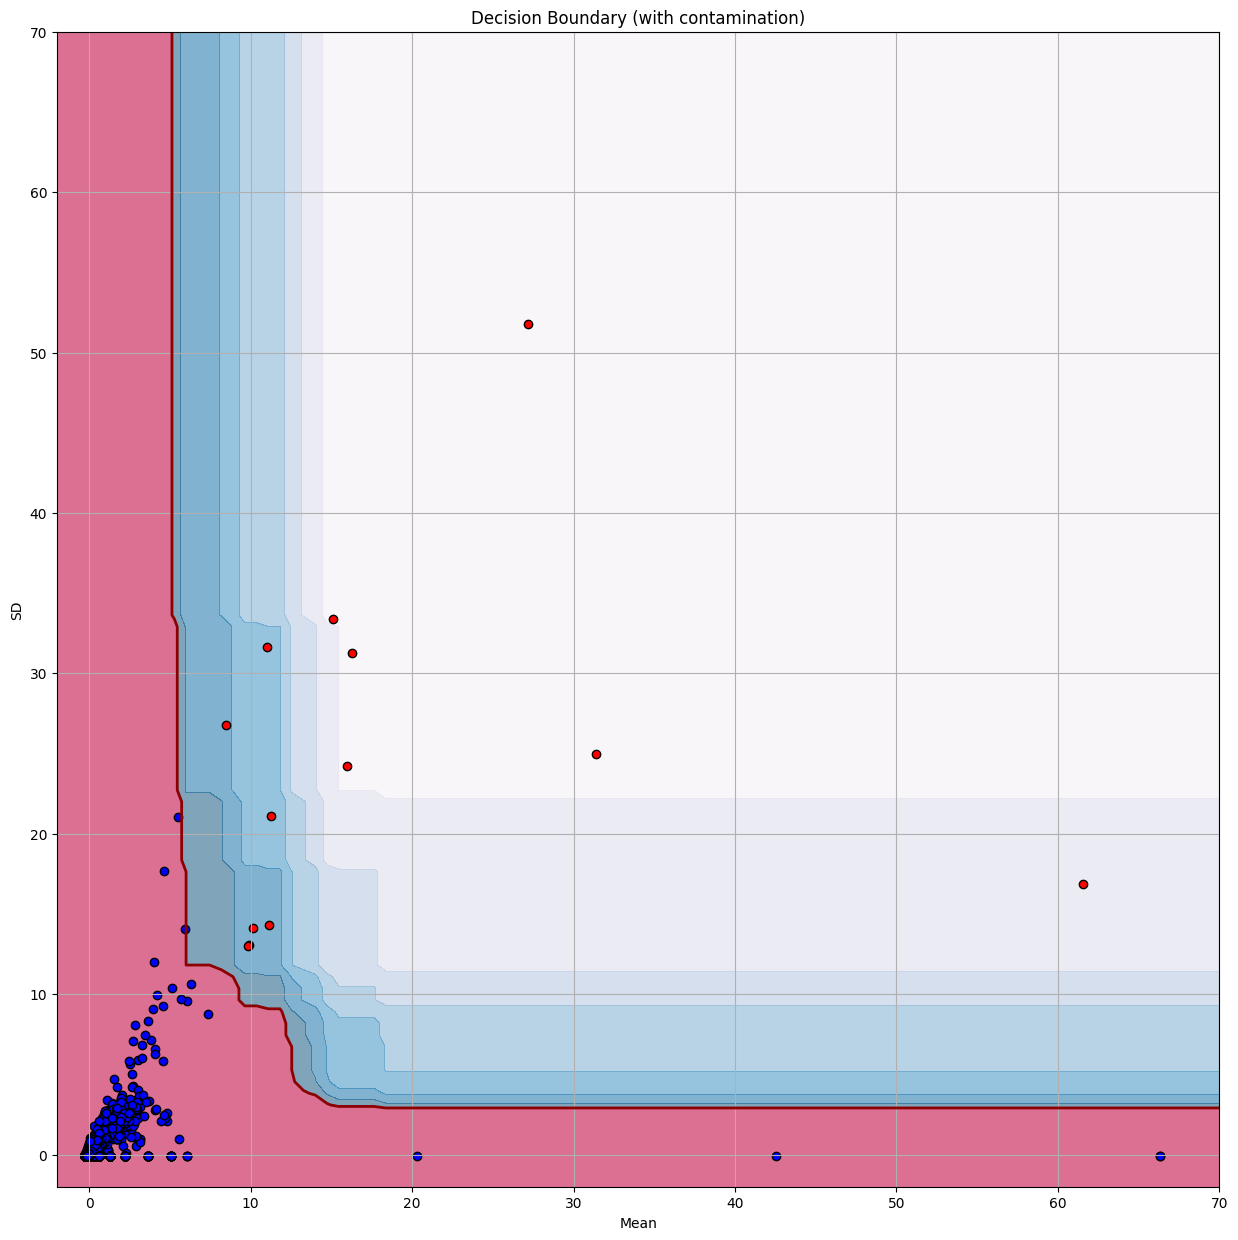

In [12]:
# Plot of the test dataset and the contamination model's decision frontier.
plt.rcParams['figure.figsize'] = [15, 15]

xx, yy = np.meshgrid(np.linspace(-2, 70, 100), np.linspace(-2, 70, 100))
Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.title("Decision Boundary (with contamination)")
plt.contourf(xx, yy, Z, levels=np.linspace(
    Z.min(), 0, 8), cmap=plt.cm.PuBu, alpha=0.5)
plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='darkred')
plt.contourf(xx, yy, Z, levels=[0, Z.max()], colors='palevioletred')
plt.scatter(df_predictions[df_predictions['output'] == 1 ].iloc[:, 0],
                 df_predictions[df_predictions['output'] == 1 ].iloc[:, 1],
                 c='blue', edgecolors='k')

plt.scatter(df_predictions[df_predictions['output'] == -1 ].iloc[:, 0],
                 df_predictions[df_predictions['output'] == -1 ].iloc[:, 1],
                 c='red', edgecolors='k')
plt.xlabel('Mean')
plt.ylabel('SD')
plt.grid(True)
plt.show()

In [13]:
from joblib import dump
dump(model, 'model.joblib') 

['model.joblib']